# Datos del Estudiante.

1. Nombre: Luis Felipe Narváez Gómez 
2. Código: 2312660
3. Universidad Santo Tomas seccional Tunja
4. Facultad: Ingeniería de Sistemas
5. Asignatura: Electiva I - Deep Learning
6. Periodo: 2021-2

# K-means

## Ejercicio de Psicologia (los grandes cinco)

La base de datos se tomo del siguiente zelda:

https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

### Importar librerias

In [37]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

### Configuracion PLT

In [38]:
"""
Toma las configuraciones generales de matplotlib y:
1. asigna un tamaño predefinido para las imagenes
2. asigna un estilo de grafico para todas las figuras presentadas a continuacion
"""

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Importar DataSet

El database se tomara del siguiente Github:

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T9/k-means-psicologia.csv

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T9/k-means-psicologia.csv

In [39]:
"""
Toma la base de datos presentada en un github y extrae los datos para guardarlos en "df_psico"
muestra las tres primeras filas de informacion
"""

df_psico = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T9/k-means-psicologia.csv", encoding='utf-8')
df_psico.head(3)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4


### Informacion de datos

In [40]:
""" Da la informacion general de los datos presentados en "df_psico" """
df_psico.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [41]:
"""busca si en la base de datos si existe algun dato nulo y va contando"""
df_psico.isnull().sum()

usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

### Graficos Datos

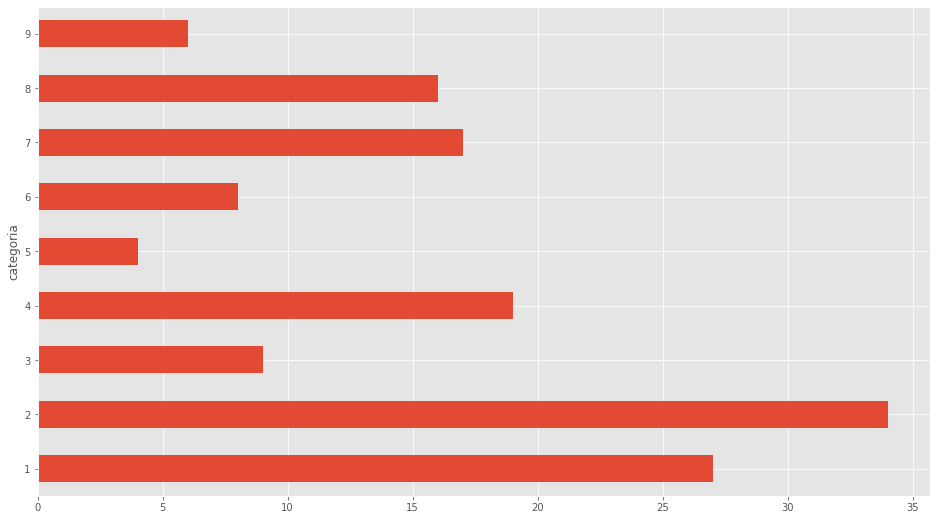

In [42]:
"""
grafica los datos presentados en "df_psico" contra el tamaño de de la columna 'categoria'  y lo imprime en un grafico (plot) de barras (barth)
"""
df_psico.groupby('categoria').size().plot.barh()

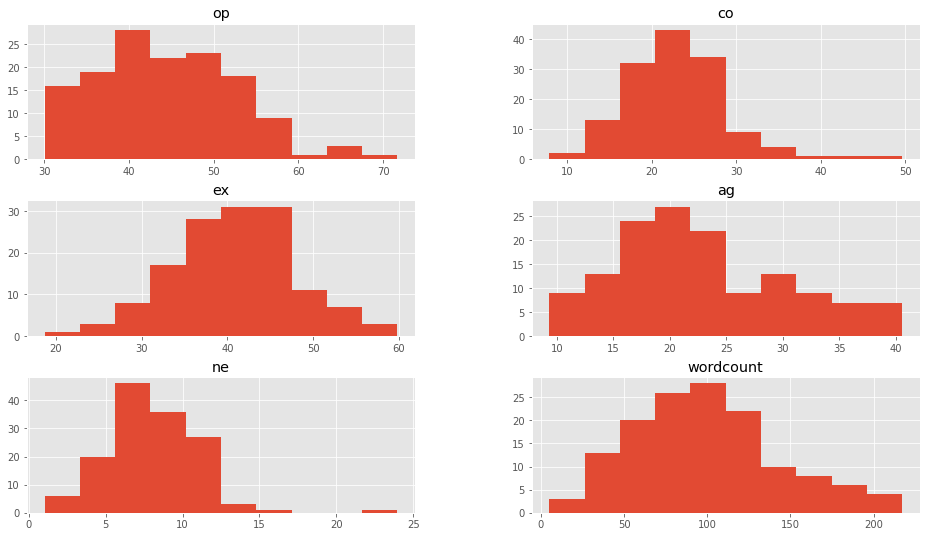

In [43]:
#Dispersión de los mismos datos
"""Graficara todos los datos de forma de histograma (hist), menos el que corresponde a Categoria"""
df_psico.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


'Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías.'

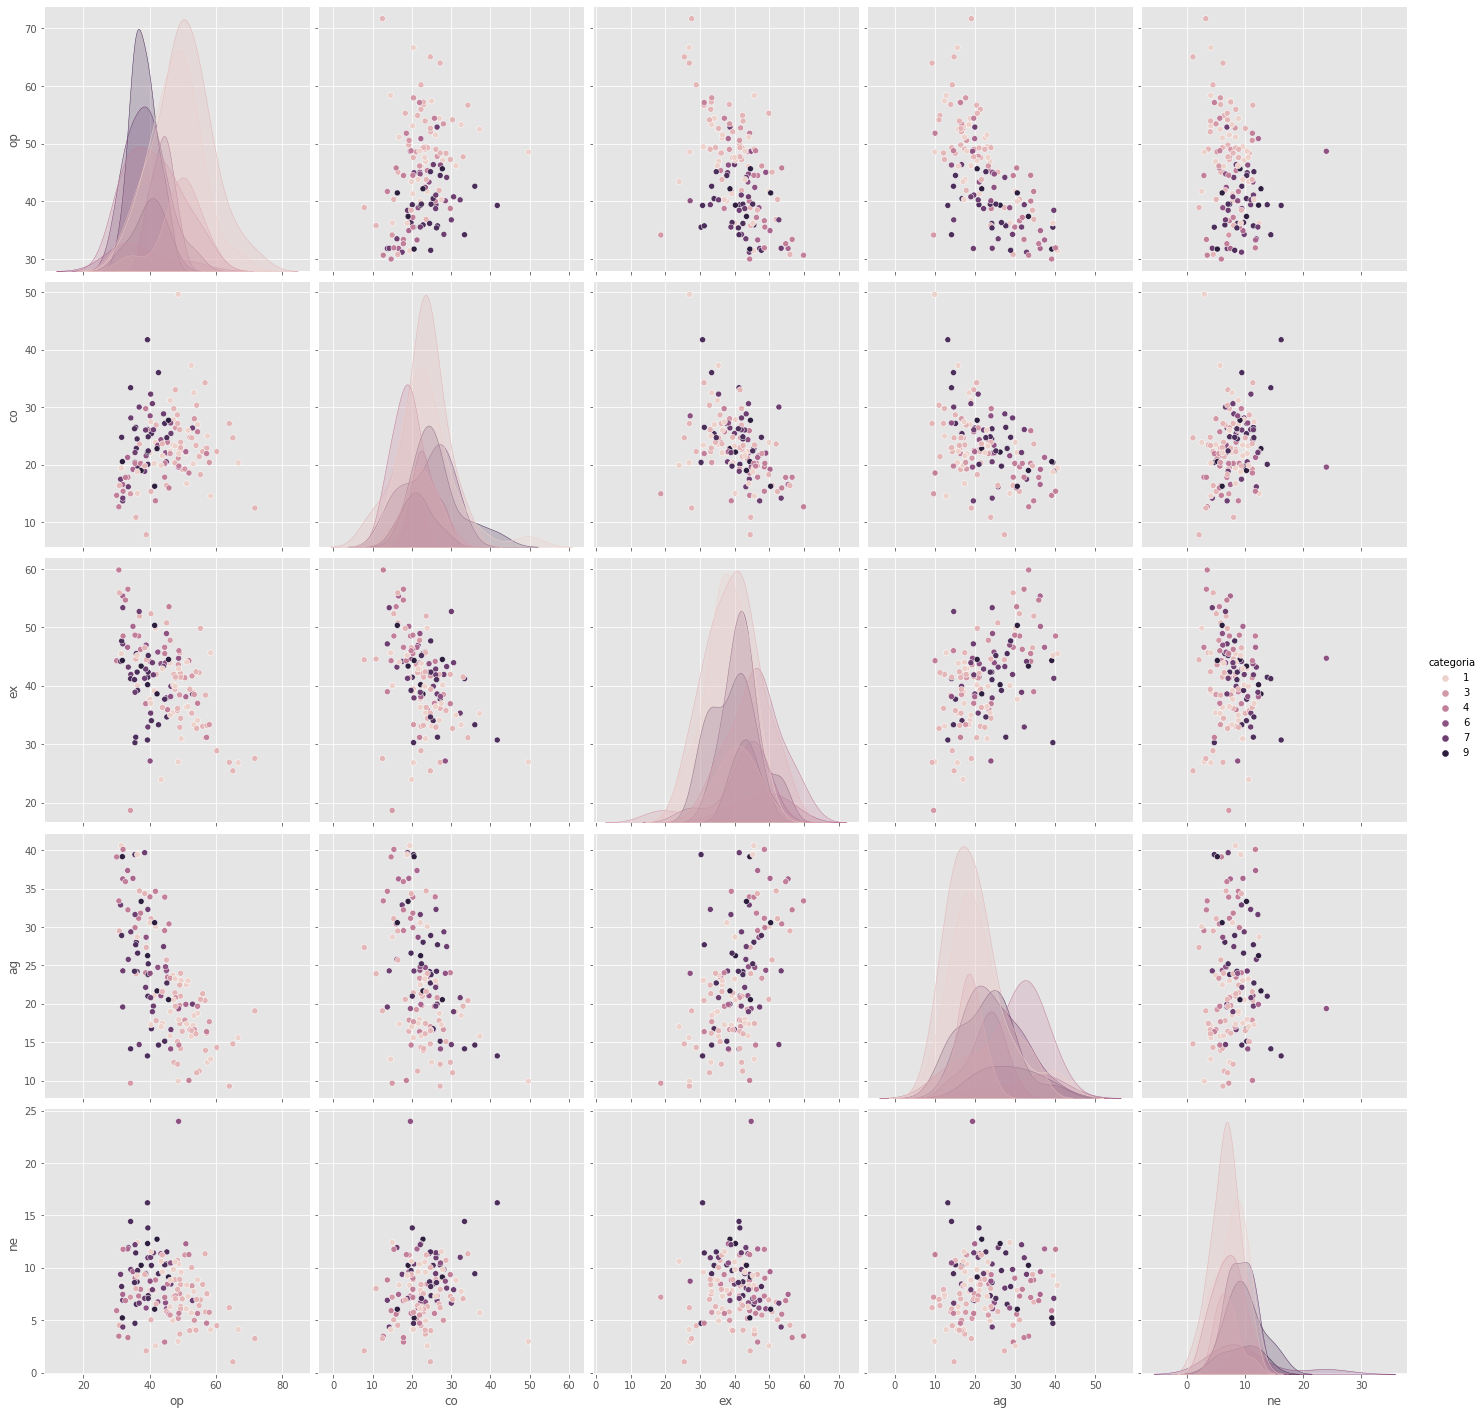

In [44]:
"""
graficos de relaciones en pares en el dataset.

hue = variación de colores dependiendo del valor de la variable
Hara un grafico de correlaciones
"""

#sb.pairplot(df_psico, hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')
sb.pairplot(df_psico, hue='categoria',size=4,vars=["op","co","ex","ag","ne"],kind='scatter')

"""Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías."""

### Separacion de datos (X,Y)

**Aca no trabajaremos con train y test pues no es un algoritmo de aprendizaje supervisado**

In [46]:
# X = np.array(df_psico[["op","ex","ag"]])
X = np.array(df_psico[["op","co","ex","ag","ne"]])
y = np.array(df_psico['categoria'])
#forma de la matriz
X.shape

(140, 5)

### Grafico en 3D

['black', 'black', 'cyan', 'green', 'cyan', 'black', 'black', 'yellow', 'black', 'black', 'blue', 'red', 'red', 'green', 'pink', 'blue', 'cyan', 'orange', 'green', 'cyan', 'green', 'blue', 'blue', 'black', 'green', 'cyan', 'pink', 'red', 'cyan', 'blue', 'pink', 'red', 'green', 'black', 'cyan', 'yellow', 'red', 'green', 'green', 'red', 'orange', 'green', 'orange', 'red', 'red', 'green', 'orange', 'blue', 'red', 'black', 'green', 'pink', 'orange', 'green', 'pink', 'green', 'red', 'blue', 'pink', 'green', 'pink', 'cyan', 'green', 'red', 'pink', 'brown', 'red', 'red', 'green', 'cyan', 'orange', 'pink', 'pink', 'cyan', 'brown', 'green', 'pink', 'cyan', 'cyan', 'brown', 'yellow', 'green', 'cyan', 'red', 'green', 'black', 'green', 'blue', 'green', 'red', 'green', 'black', 'green', 'green', 'red', 'black', 'black', 'green', 'cyan', 'orange', 'red', 'red', 'red', 'cyan', 'green', 'cyan', 'green', 'pink', 'black', 'yellow', 'brown', 'brown', 'pink', 'brown', 'black', 'red', 'pink', 'green', 'cya

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


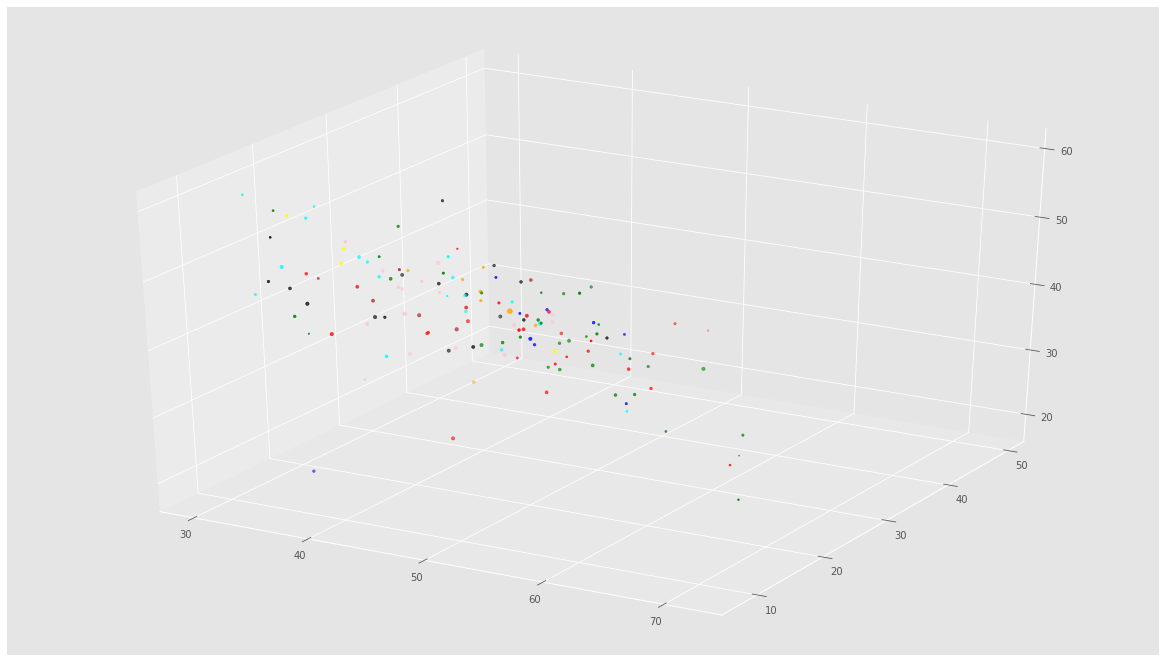

In [55]:
fig = plt.figure()
ax = Axes3D(fig) # variable auxiliar donde tomar la figura y tratarla como  grafico 3D
#10 categorias / 10 colores
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple'] # array de colores
asignar=[] # array para almacenar los datos y darles un color

# recorrame las columnas en categoria, añada a el arreglo "asignar" un color con un valor de la columna
for row in y:
    asignar.append(colores[row])


print(asignar)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3],X[:, 4], c=asignar) 
# graficame los 3 datos correspondientes, los valores de Y de cada dato, ( son 3 datos originalmente)

### Encontrar numero de Clousters

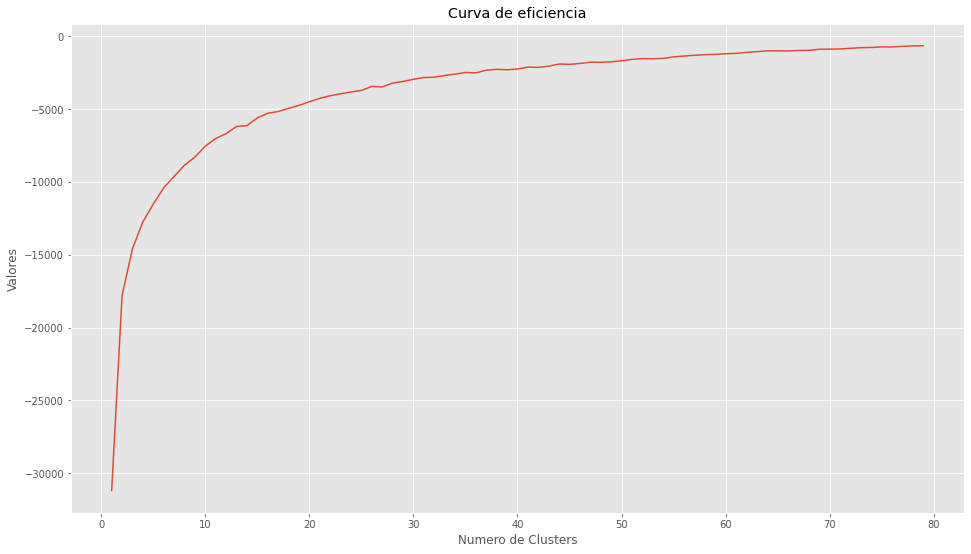

In [78]:
# Metodo del codo

"""
En este , el numero de clousters indicado para tratar la base de datos es aquel 
que se encuentra en la curva grafica generada, un codo. el mismo corresponde al 
valor medio del mismo de manera grafica o al dado segun por interpretacion visual
en toda la curva representada.
"""
Nc = range(1, 80)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

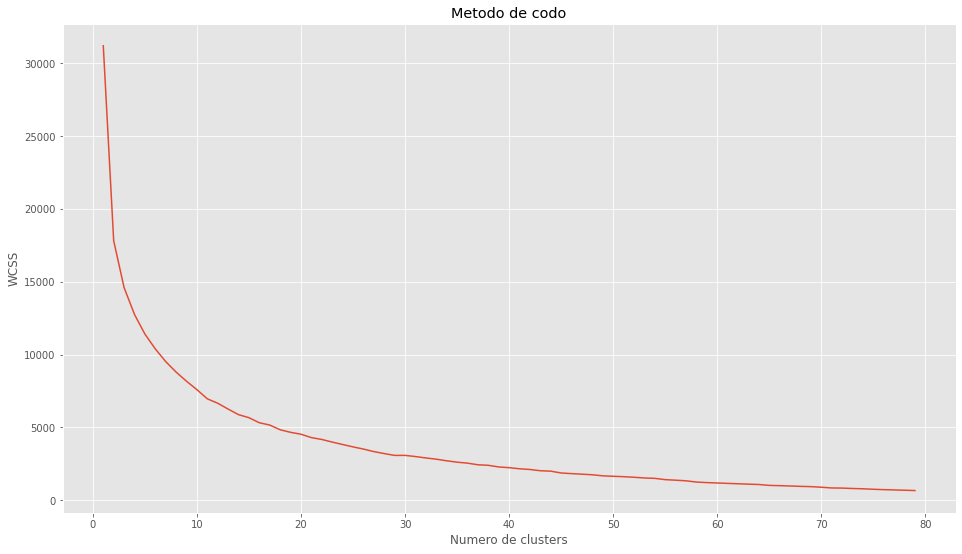

In [79]:
wcss = []
for i in range(1, 80):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 80), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

### Ubicar centroides

In [80]:
# valor de los centroides
kmeans = KMeans(n_clusters=10).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[41.43244567 19.51305383 48.19598389 28.74034267  5.91121333]
 [61.93625244 21.92653989 29.62719367 15.08910133  4.93914989]
 [41.6223096  25.9311346  41.5600054  19.5475445  10.50304495]
 [47.464074   33.32105467 34.3116134  16.05878713  8.82592993]
 [35.82913987 21.421626   40.92520987 27.186529    9.705466  ]
 [49.38559123 24.06417986 36.78052395 21.53848886  8.60233459]
 [31.89659283 15.92909    55.9515465  31.92967183  5.00179033]
 [38.81528    17.4348775  21.3382215  13.3573675   8.9133485 ]
 [35.1909685  18.90915593 43.82350486 37.16073271  8.59227229]
 [51.83270253 21.25672526 42.73729921 15.97081163  6.51300253]]


In [81]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes.

#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


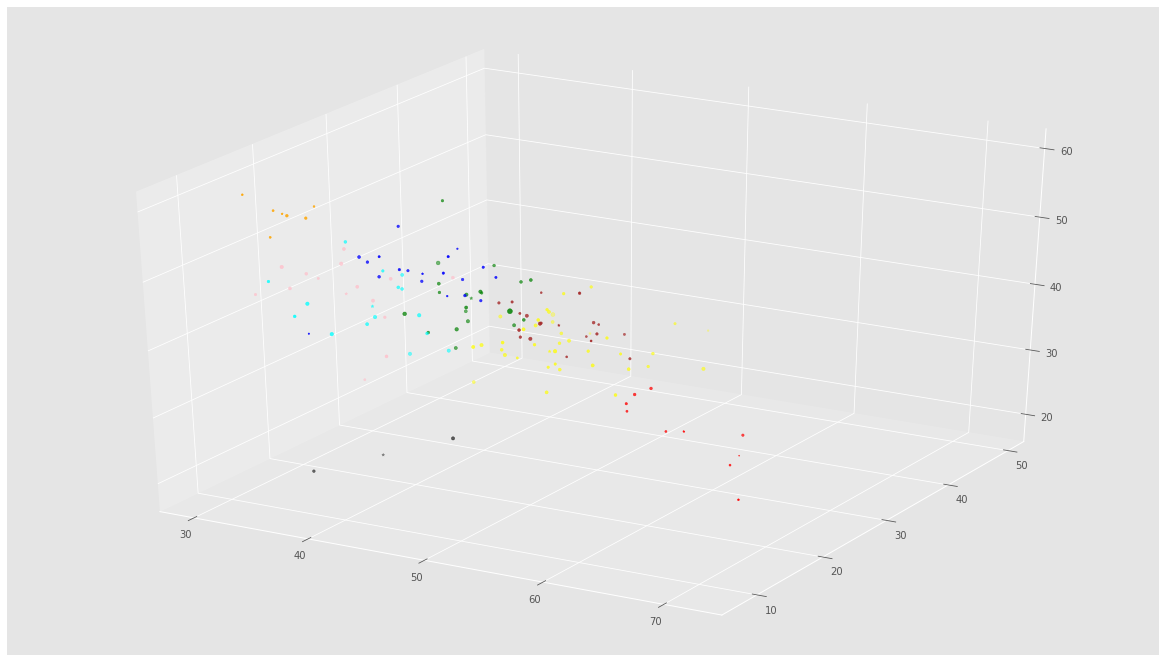

In [83]:
# Getting the cluster centers
C = kmeans.cluster_centers_
# colores=['blue','red','green','yellow','cyan'] #,'yellow','orange','black','pink','brown']
colores=['blue','red','green','yellow','cyan','yellow','orange','black','pink','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], c=asignar)
# ax.scatter(C[:, 0], C[:, 1], C[:, 2] marker='*', c=colores, s=1000)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], C[:, 3], C[:, 4], marker='*', c=colores)

### Graficos en 2D

En este caso tenemos "op","co","ex","ag","ne", cinco variables, las combinaciones de graficos posible es:

1. op ---> op 
2. op ---> co
3. op ---> ex
4. op ---> ag
5. op ---> ne


4. ex ---> op
5. ex ---> co
6. ex ---> ex
7. ex ---> ag
8. ex ---> ne


7. ag ---> op
8. ag ---> co
9. ag ---> ex
10. ag ---> ag
11. ag ---> ne

si quitamos las repeticiones y las relaciones redundantes de las agrupaciones tenemos::

1. op ---> co
2. op ---> ex
3. op ---> ag
4. op ---> ne
5. ex ---> co
6. ex ---> ag
7. ex ---> ne
8. ag ---> co
9. ag ---> ne


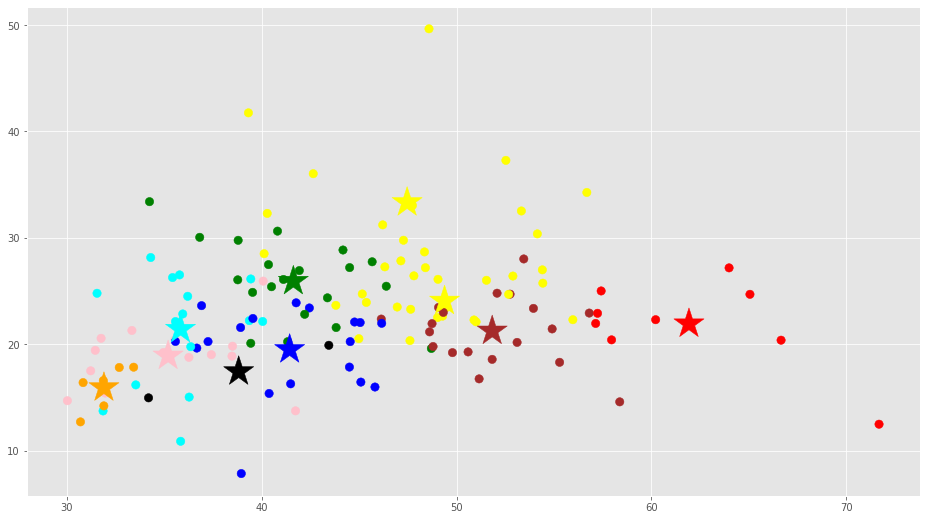

In [84]:
# mostramos grupos según Openess y Extraversion 
f1 = df_psico['op'].values
f2 = df_psico['co'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0 ], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

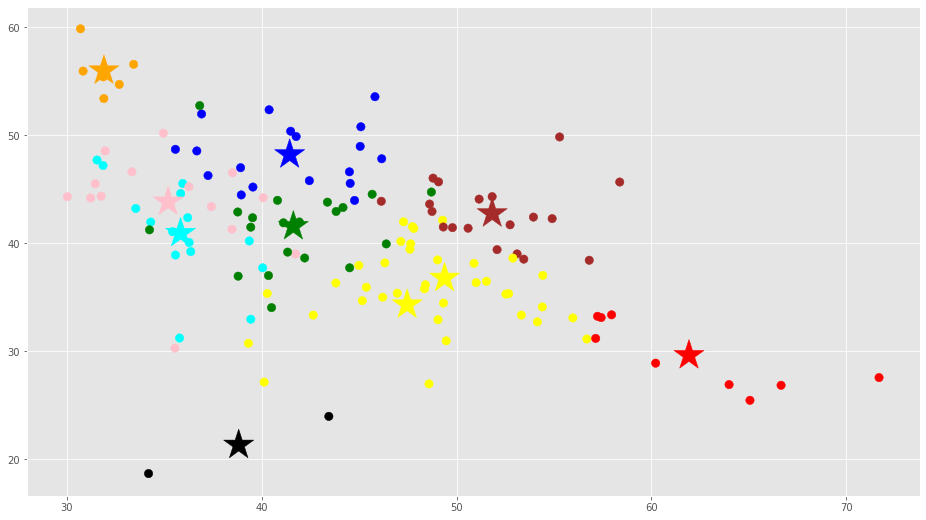

In [85]:
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

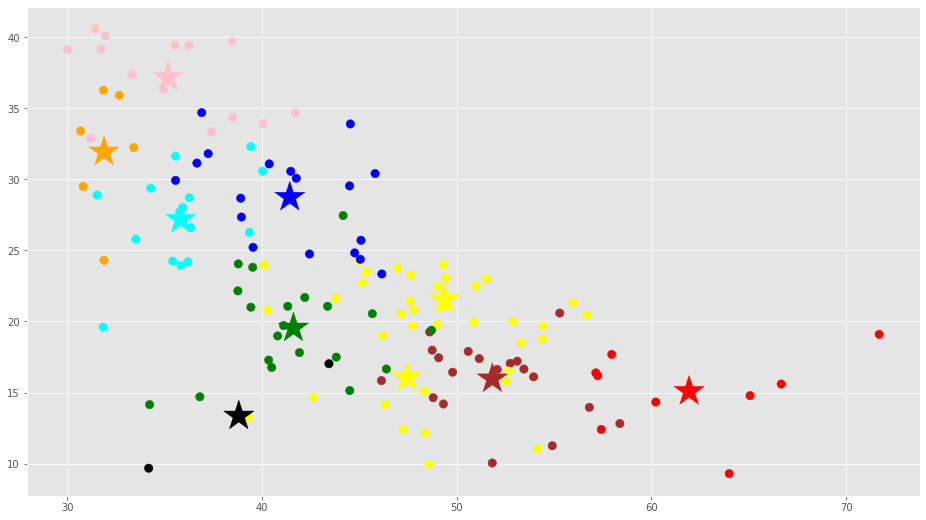

In [88]:
f1 = df_psico['op'].values
f2 = df_psico['ag'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 3], marker='*', c=colores, s=1000)
plt.show()

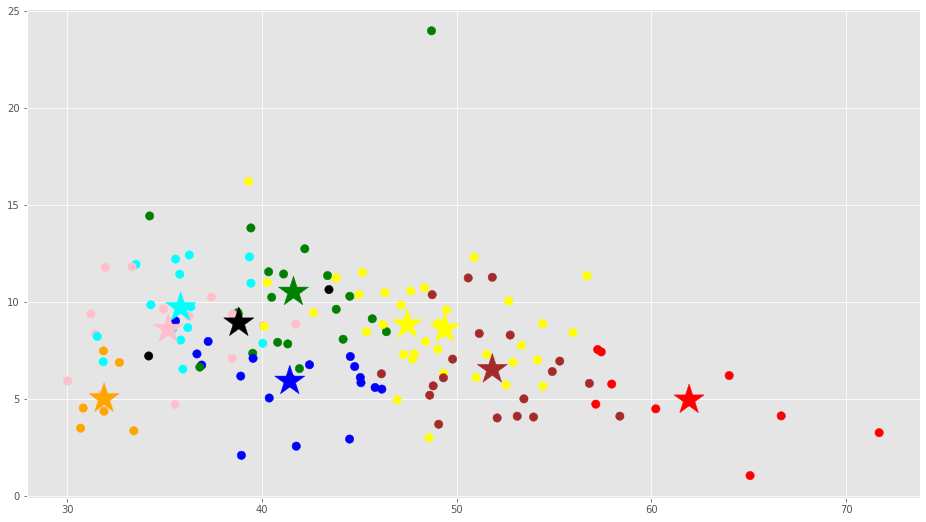

In [89]:
f1 = df_psico['op'].values
f2 = df_psico['ne'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 4], marker='*', c=colores, s=1000)
plt.show()

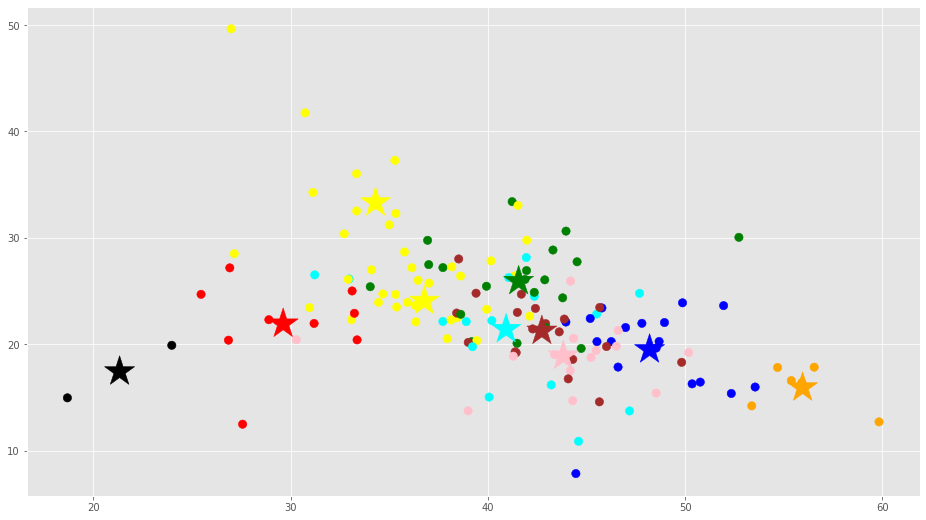

In [90]:
f1 = df_psico['ex'].values
f2 = df_psico['co'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

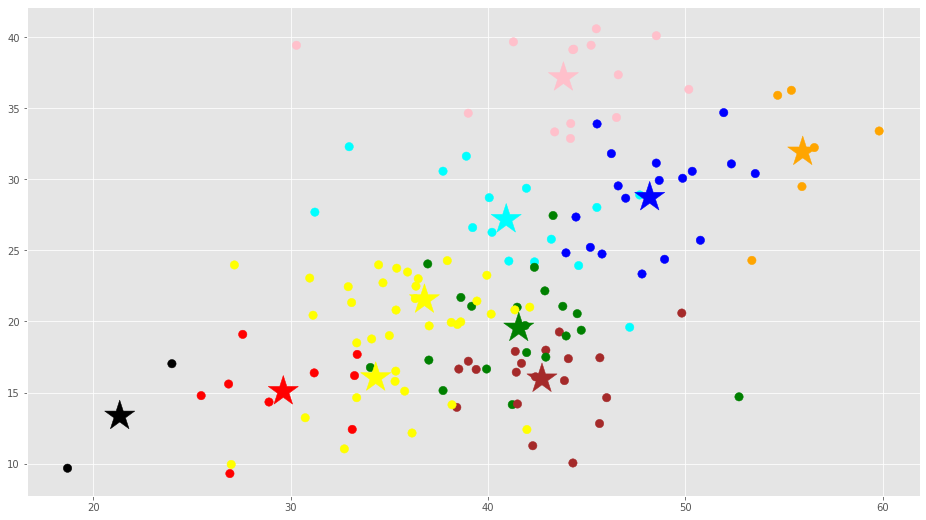

In [91]:
f1 = df_psico['ex'].values
f2 = df_psico['ag'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 3], marker='*', c=colores, s=1000)
plt.show()

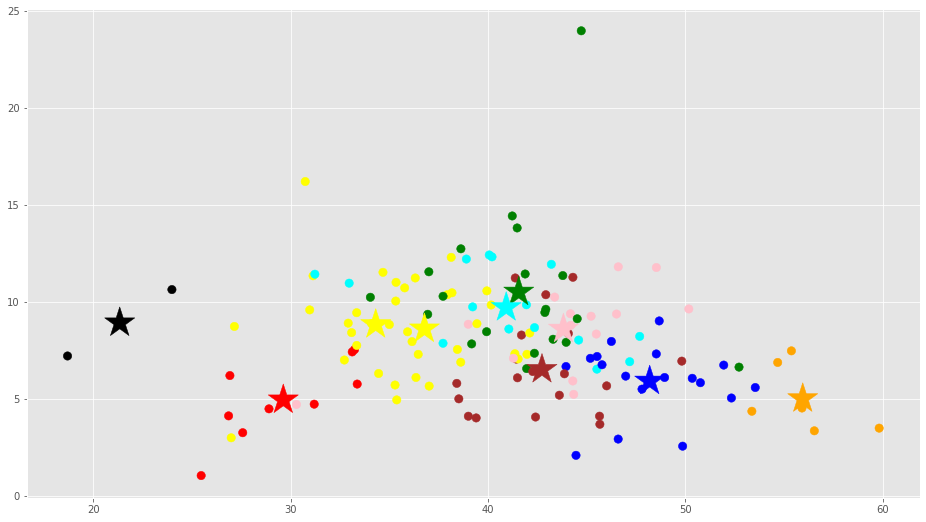

In [92]:
f1 = df_psico['ex'].values
f2 = df_psico['ne'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 2], C[:, 4], marker='*', c=colores, s=1000)
plt.show()

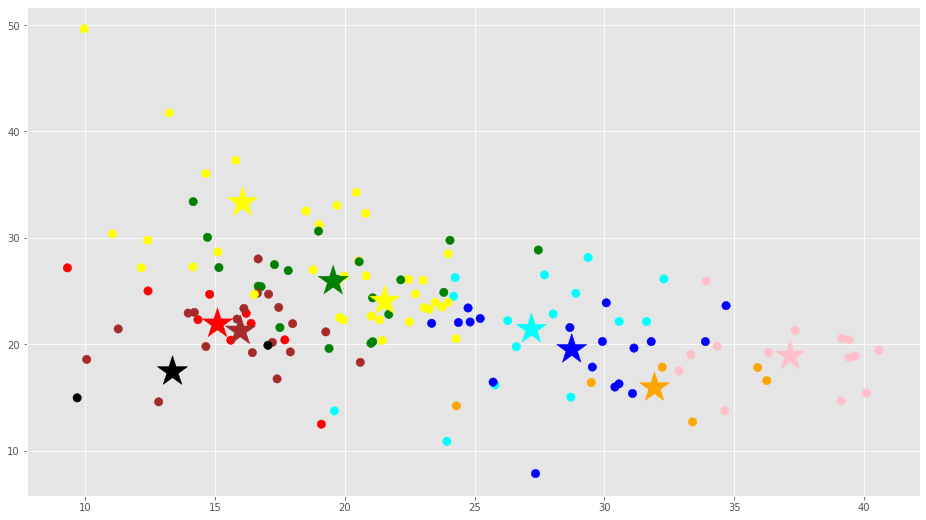

In [93]:
f1 = df_psico['ag'].values
f2 = df_psico['co'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,3 ], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

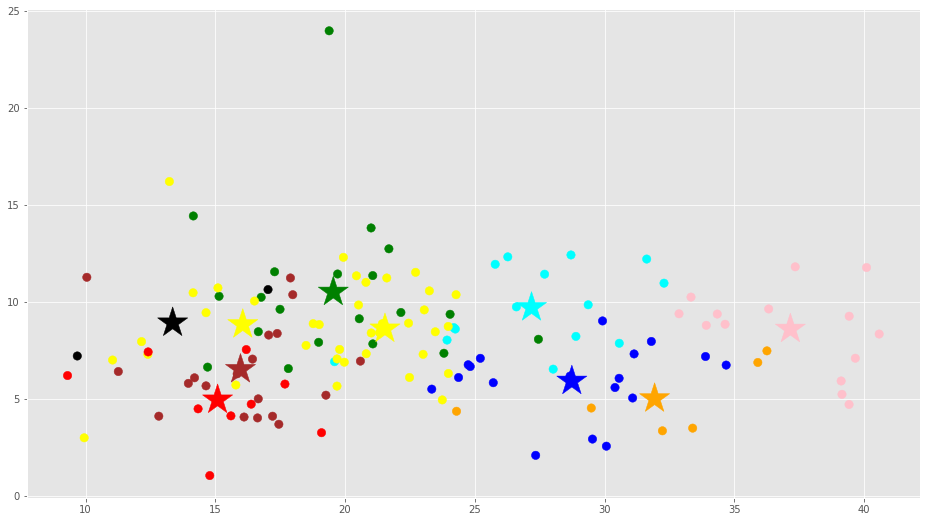

In [94]:
f1 = df_psico['ag'].values
f2 = df_psico['ne'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 3], C[:,4], marker='*', c=colores, s=1000)
plt.show()

### Resultados en Tablas

In [95]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,18
1,red,9
2,green,20
3,yellow,15
4,cyan,15
5,yellow,22
6,orange,6
7,black,2
8,pink,14
9,brown,19


#### Diversidad por categorias laborales

In [96]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,1.0
2,2,4.0
3,3,1.0
4,4,6.0
5,5,NaN
6,6,4.0
7,7,NaN
8,8,1.0
9,9,1.0


### Usuarios por rasgos de personalidad mas similares

In [97]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_psico.index.values
df_cluster['data_index']= df_psico.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,3gerardpique,4
1,aguerosergiokun,5
2,albertochicote,8
3,AlejandroSanz,0
4,alfredocasero1,0


In [100]:
df_cluster[df_cluster.cluster == 5]

,data_index,cluster
1,aguerosergiokun,5
12,aplusk,5
13,AvrilLavigne,5
25,cesarmillan,5
29,CindyCrawford,5
32,Courtney,5
33,Cristiano,5
39,Diane_Keaton,5
56,GwynethPaltrow,5
57,heidiklum,5


### Usuarios mas relebantes en cada clouster

In [101]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

fieritacatalano
foofighters
paugasol
SJP
JohnKerry
CindyCrawford
davidbisbal
SSantiagosegura
_josecoronado_
britneyspears


### Clasificacion de nuevos datos

In [103]:
X_new = np.array([[45.92,57.74,15.66,18,20]]) 
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[3]
